In [1]:
import random # 의사 난수 생성 package
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt # 시각화 패키지
%matplotlib inline
import seaborn as sns # 시각화 패키지

In [2]:
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else : 
    font_family = "AppleGothic"

In [3]:
sns.set(font=font_family, rc={"axes.unicode_minus" : False})

In [4]:
# 3000 개의 랜덤 데이터 생성
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [5]:
data [0:2]

[46, 70]

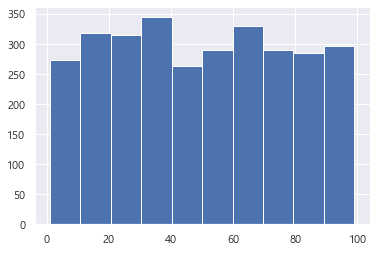

In [6]:
# 히스토그램으로 생성된 데이터 분포 확인
plt.hist(data)
plt.show()

In [7]:
# Data 의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

49.61
28.09501557216155


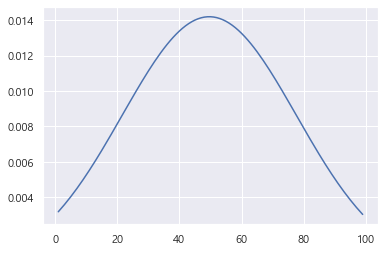

In [8]:
# 확률밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

2.6053233644537006e-17
1.0


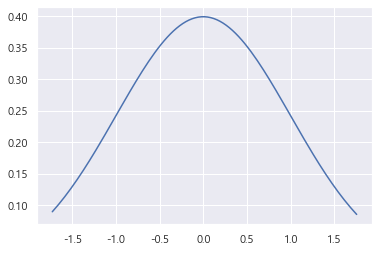

In [9]:
# 표준정규분포(Z분포)로 변환
std_list = []

for i in data :
    z = (i - data_mean) / data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),
                       ol_data_mean,ol_data_std)

plt.figure()
plt.plot(np.sort(std_list),ol_pdf)

In [10]:
''' 데이터셋에 이상값 추가 '''

' 데이터셋에 이상값 추가 '

In [11]:
# 이상값 추가
ol_data = data.copy()
ol_no =  10

for i in range(ol_no) :
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2) # 이상값 생성

49.819933554817275
28.384383451395433


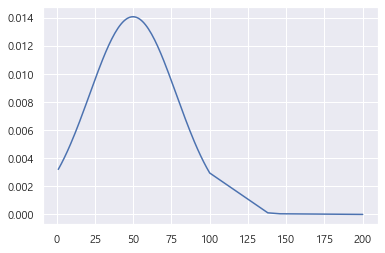

In [12]:
# 이상값이 추가된 데이터의 정규분포도
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),
                       ol_data_mean,ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data),ol_pdf)

7.081821286645516e-18
0.9999999999999999


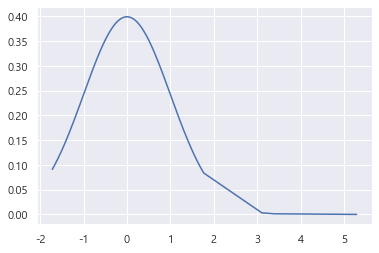

In [13]:
# 이상값이 추가된 데이터의 표준화

ol_std_list = []

for i in ol_data :
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),
                           ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [14]:
''' Z 값의 2가 넘어가는 데이터 삭제 '''

' Z 값의 2가 넘어가는 데이터 삭제 '

In [15]:
# 전체 라인수 확인
len(ol_std_list) # 10개가 추가되었었음

3010

In [16]:
# -2 ~ 2 범위를 벗어나면 이상값으로 제거한다.

for i in ol_std_list :
    z = i
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

In [17]:
# 이상값 제거 후 라인수
len(ol_std_list) # 4개만 삭제 대상임

3006

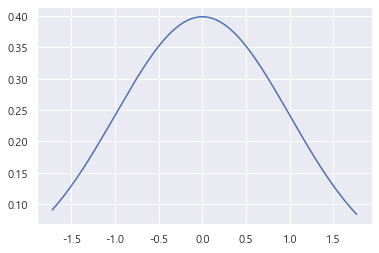

In [18]:
# 이상값 제거 후 표준정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [19]:
''' 사분위수 범위로 이상값 삭제 '''

' 사분위수 범위로 이상값 삭제 '

In [20]:
# 이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns = ["A열", 'B열', 'C열'])
boxdata.head()

,A열,B열,C열
0,-1.576251,1.352934,-1.721936
1,1.931322,-2.131333,-1.804937
2,0.737103,0.055721,-0.191724
3,-0.864866,-0.855338,0.729472
4,0.063354,0.550674,0.277594


In [21]:
# 기술 통계 정보로 pencentile 확인
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.078668,-0.180231,0.114559
std,1.082871,1.148346,0.915339
min,-2.722893,-3.999286,-2.224429
25%,-0.924146,-0.974314,-0.450655
50%,-0.076252,-0.058816,0.125516
75%,0.724205,0.492298,0.750879
max,2.199819,3.232247,2.381486


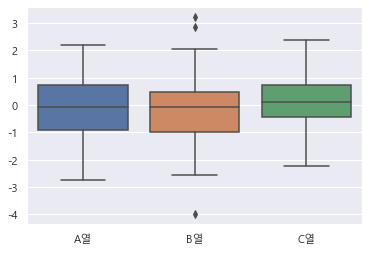

In [22]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [23]:
# 이상값 계산하는 함수
def get_outlier(df = None, column = None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [24]:
boxdata.shape

(100, 3)

In [25]:
# 함수 사용해서 이상값 확인
outlier_idx = get_outlier(df = boxdata, column = "B열", weight = 1.5)
outlier_idx

Int64Index([13, 37, 49], dtype='int64')

In [26]:
# 이상값 삭제
boxdata.drop(outlier_idx, axis = 0, inplace=True)

In [27]:
boxdata.shape

(97, 3)

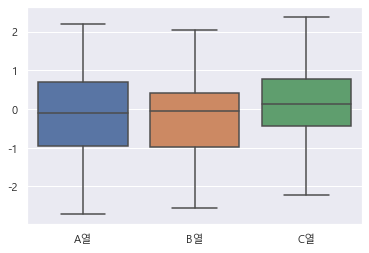

In [28]:
# 박스플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()